# CS 224D Assignment #2
# Part [0]: Warmup: Boolean Logic

To appreciate the power of neural networks to learn complex patterns, it can help to revisit a classic example. It is well-known that a single linear classifier cannot represent the XOR function $x \oplus y$, depicted below*: there is no way to draw a single line that can separate the red and magenta (square) points from the blue and cyan (circle) points.

*Gaussian noise is added to make the point clouds more illustrative; however, you can perform your analysis as if all points were truly boolean variables $(x,y) \in \{0,1\}^2$.

In [1]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
matplotlib.rcParams['savefig.dpi'] = 100

%load_ext autoreload
%autoreload 2

In [2]:
colors = 'rbcm'
markers = 'soos'
def show_pts(data):
    for i in range(4):
        idx = (arange(npts) % 4 == i)
        plot(data[0,idx], data[1,idx], 
             marker=markers[i], linestyle='.',
             color=colors[i], alpha=0.5)
    gca().set_aspect('equal')

def show_pts_1d(data):
    for i in range(4):
        idx = (arange(npts) % 4 == i)
        plot(data[idx], marker=markers[i], linestyle='.',
             color=colors[i], alpha=0.5)
    gca().set_aspect(npts/4.0)
    
#### Copy in your implementation from Assignment #1 ####
def sigmoid(x):
    x = 1.0/(1+np.exp(-x))
    return x # dummy
#### or if the starter code is posted, uncomment the line below ####
# from nn.math import sigmoid

ValueError: You passed in an invalid linestyle, `.`.  See docs of Line2D.set_linestyle for valid values.

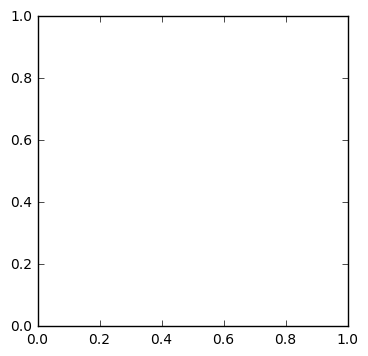

In [3]:
npts = 4 * 40; random.seed(10)
x = random.randn(npts)*0.1 + array([i & 1 for i in range(npts)])
y = random.randn(npts)*0.1 + array([(i & 2) >> 1 for i in range(npts)])
data = vstack([x,y])
figure(figsize=(4,4)); show_pts(data); ylim(-0.5, 1.5); xlim(-0.5, 1.5)
xlabel("x"); ylabel("y"); title("Input Data")

A two-layer neural network, however, can separate this pattern easily. Below, we give you a simple dataset in two dimensions that represents a noisy version of the XOR pattern. Your task is to hand-pick weights for a *very* simple two-layer network, such that it can separate the red/magenta points from the blue/cyan points.

The network uses the following equations, for $W \in \mathbb{R}^{2\times2}$ and $U \in \mathbb{R}^{2}$:

$$ h = \sigma(z\cdot(Wx + b_1)) $$
$$ p = \sigma(z\cdot(Uh + b_2)) $$

where $z$ controls how steep the sigmoid function is; higher values make it approach a step function.

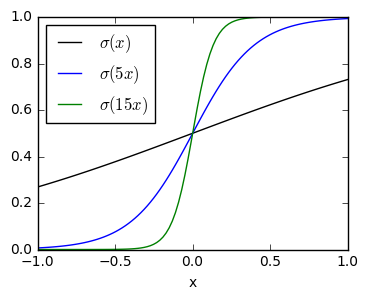

In [4]:
x = linspace(-1, 1, 100); figure(figsize=(4,3))
plot(x, sigmoid(x), 'k', label="$\sigma(x)$"); 
plot(x, sigmoid(5*x), 'b', label="$\sigma(5x)$");
plot(x, sigmoid(15*x), 'g', label="$\sigma(15x)$");
legend(loc='upper left'); xlabel('x');

In the area below, enter values for $W$, $b_1$, $U$, and $b_2$ that will properly place blue and cyan above the dashed line, and red and magenta below.

*Hint:* think about how you can make the data linearly separable after going through the hidden layer. Then find a direction $U$ along which you can separate it!

*Hint:* It may help to think about each "neuron" (i.e. row of $W$ or $U$) separately.

ValueError: You passed in an invalid linestyle, `.`.  See docs of Line2D.set_linestyle for valid values.

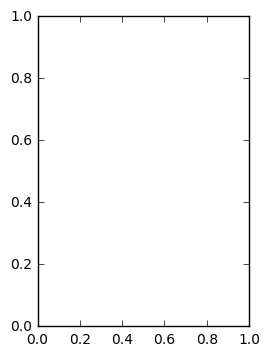

In [6]:
W = zeros((2,2))
b1 = zeros((2,1))
U = zeros(2)
b2 = 0

#### YOUR CODE HERE ####

W[0, 0] = 1
W[0, 1] = -1
W[1, 0] = -1
W[1, 1] = 1
b1[0] = -0.5
b1[1] = -0.5
U[1] = 1
U[0] = 1
b2= 0.5

z = 5 # control gate steepness

#### END YOUR CODE ####

# Feed-forward computation
h = sigmoid(z*(W.dot(data) + b1))
p = sigmoid(z*(U.dot(h) + b2))

# Plot hidden layer
subplot(1,2,1); show_pts(h)
title("Hidden Layer"); xlabel("$h_1$"); ylabel("$h_2$")
ylim(-0.1, 1.1); xlim(-0.1, 1.1)
# Plot predictions
subplot(1,2,2); show_pts_1d(p)
title("Output"); ylabel("Prediction"); xticks([])
axhline(0.5, linestyle='--', color='k')
tight_layout()